# **DAV ASSIGNMENT 5**

Dipean Dasgupta<br> 202151188

**Installing Libraries**

In [ ]:
!pip install joypy
!pip install squarify
!pip install plotly

**Importing Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import transforms
from statsmodels.graphics.mosaicplot import mosaic
from joypy import joyplot
import squarify
import plotly.express as px
from itertools import product

**Connecting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading Data**

In [ ]:
DS1=pd.read_csv('/content/drive/MyDrive/CS312_DA/Egg_Production_2007_2012.csv')
DS2=pd.read_csv('/content/drive/MyDrive/CS312_DA/Milk_Production_2007_2012.csv')

Overview of the Data

In [ ]:
DS1.head()

,States/Uts,2007-08 (In lakh nos.),2008-09 (In lakh nos.),2009-10 (In lakh nos.),2010-11 (In lakh nos.),2011-12 (In lakh nos.)
0,Andhra Pradesh,175884,183446,193958,201277,212103
1,Arunachal Pradesh,394,361,380,407,419
2,Assam,4910,4659,4671,4707,4705
3,Bihar,10707,10740,11002,7446,7552
4,Chhattisgarh,9184,9738,10520,12454,12984


In [ ]:
DS2.head()

,States/Uts,2007-08,2008-09,2009-10,2010-11,2011-12
0,Andhra Pradesh,8925,9570,10429,11203,12088
1,Arunachal Pradesh,32,24,26,28,22
2,Assam,752,753,756,790,796
3,Bihar,5783,5934,6124,6517,6643
4,Chhattisgarh,866,908,956,1029,1119


**TASK:Merge the data frames containing Egg and Milk production. Present the information in the merged data frame using any two appropriate plots.**


Merging the Data

In [ ]:
DS1.set_index('States/Uts', inplace=True)   #setting the index
DS2.set_index('States/Uts', inplace=True)
# Concatenating/merging the 2 DataFrames  with multi-level columns
DS1.columns = ['2007-08', '2008-09', '2009-10', '2010-11', '2011-12']
DS2.columns = ['2007-08', '2008-09', '2009-10', '2010-11', '2011-12']
EGMK_data = pd.concat([DS1, DS2], axis=1, keys=['Egg', 'Milk'])    #Merging the data

Overview of Merged Data

In [ ]:
EGMK_data.head()

Egg                                            Milk  \
                    2007-08   2008-09   2009-10   2010-11   2011-12 2007-08   
States/Uts                                                                    
Andhra Pradesh     175884.0  183446.0  193958.0  201277.0  212103.0  8925.0   
Arunachal Pradesh     394.0     361.0     380.0     407.0     419.0    32.0   
Assam                4910.0    4659.0    4671.0    4707.0    4705.0   752.0   
Bihar               10707.0   10740.0   11002.0    7446.0    7552.0  5783.0   
Chhattisgarh         9184.0    9738.0   10520.0   12454.0   12984.0   866.0   

                                                      
                  2008-09  2009-10  2010-11  2011-12  
States/Uts                                            
Andhra Pradesh     9570.0  10429.0  11203.0  12088.0  
Arunachal Pradesh    24.0     26.0     28.0     22.0  
Assam               753.0    756.0    790.0    796.0  
Bihar              5934.0   6124.0   6517.0   6643.0  
Chhattisgarh        908.0    956.0   1029.0   1119.0

In [ ]:
EGMK_df = pd.DataFrame(EGMK_data) #converting the Merged data to dataframe

In [ ]:
MK = EGMK_data['Milk']
MK= MK.dropna()
MK_arr = MK.values  #Taking values for convenience in nested pie plots


**NESTED PIE CHART**

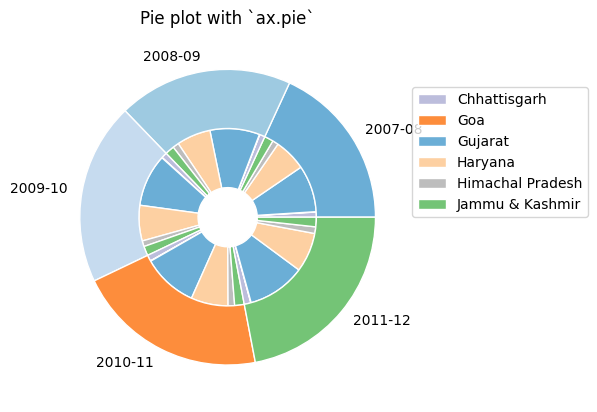

In [ ]:
fig, ax = plt.subplots()  #Initializing subplots

size = 0.4    #setting the size parameter for the pie chart

cmap=plt.get_cmap("tab20c")           #retrieves a colormap named "tab20c" from Matplotlib.
outer_colors = cmap([1,2,3,5,9,1])
inner_colors = cmap([14,5,1,7, 18,9])

MK_arr = MK_arr[4:10]       #selecting a subset of the whole data
outerlabels=MK.columns.tolist()
innerlabels=MK.index.tolist()[4:10]

#Plotting the inner piechart
l2=ax.pie(MK_arr.T.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))
#Plotting the outer pie chart
l1=ax.pie(MK_arr.sum(axis=0), radius=1, colors=outer_colors, labels =outerlabels,
       wedgeprops=dict(width=size, edgecolor='w'))


ax.legend(innerlabels,loc=(1,0.5))
ax.set(aspect="equal", title='Pie plot with `ax.pie`')      #setting the aspect ratio of the plot
plt.show()


In [ ]:
EG = EGMK_data['Egg']
EG= EG.dropna()
EG_arr = EG.values

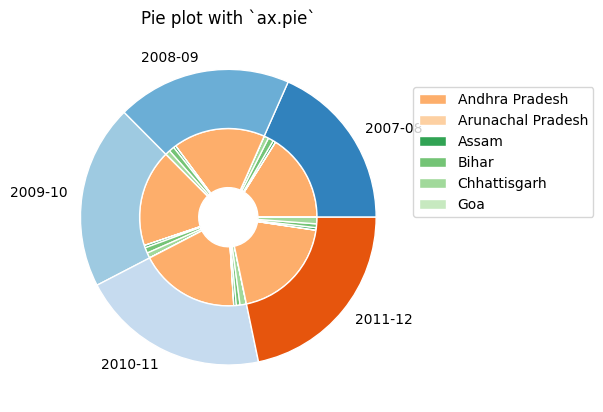

In [ ]:
fig, ax = plt.subplots()

size = 0.4

cmap=plt.get_cmap("tab20c")
outer_colors = cmap([0, 1, 2, 3, 4, 5])
inner_colors = cmap([6, 7, 8, 9, 10, 11])
#print(outer_colors)
EG_arr = EG_arr[0:6]
outerlabels=EG.columns.tolist()
innerlabels=EG.index.tolist()[0:6]


l2=ax.pie(EG_arr.T.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))
l1=ax.pie(EG_arr.sum(axis=0), radius=1, colors=outer_colors, labels =outerlabels,
       wedgeprops=dict(width=size, edgecolor='w'))


ax.legend(innerlabels,loc=(1,0.5))
ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

**MOSAIC PLOT**

<Figure size 1600x800 with 0 Axes>

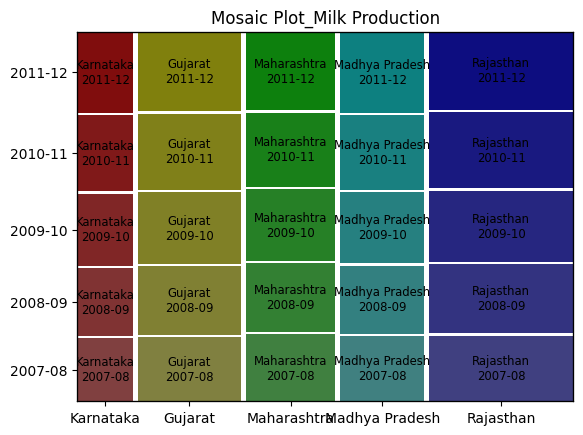

In [ ]:
MKs = pd.DataFrame(DS2, index=['Karnataka', 'Gujarat','Maharashtra','Madhya Pradesh','Rajasthan'])

# Reshaping DataFrame for plotting
MKs_stk = MKs.stack()

# Creating the mosaic plot
plt.figure(figsize=(16, 8))  #Setting plot dimensions
mosaic(MKs_stk, gap=0.01,title='Mosaic Plot_Milk Production')

plt.show()     #Displaying the plot

In [ ]:
MKs

,2007-08,2008-09,2009-10,2010-11,2011-12
Karnataka,4244,4538,4822,5114,5447
Gujarat,7911,8386,8844,9321,9817
Maharashtra,7210,7455,7679,8044,8469
Madhya Pradesh,6572,6855,7167,7514,8149
Rajasthan,11377,11931,12330,13234,13512


<Figure size 1600x800 with 0 Axes>

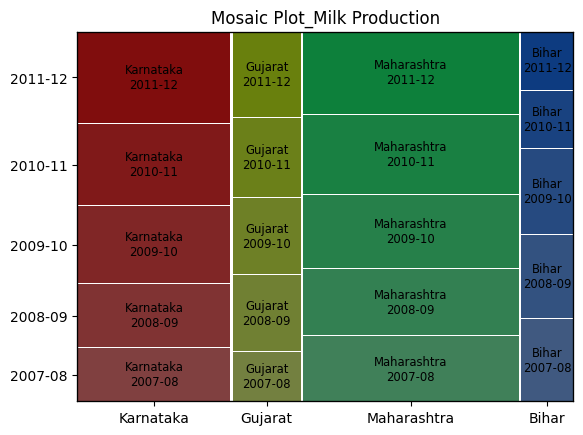

In [ ]:
EGs = pd.DataFrame(DS1, index=['Karnataka', 'Gujarat','Maharashtra','Bihar'])

# Reshaping DataFrame for plotting
EGs_stk = EGs.stack()

# Creating mosaic plot
plt.figure(figsize=(16, 8))
mosaic(EGs_stk,gap=0.01,title='Mosaic Plot_EGG Production')
plt.show()

In [ ]:
EGs

,2007-08,2008-09,2009-10,2010-11,2011-12
Karnataka,20181,23688,29094,30674,34699
Gujarat,8256,12675,12762,13269,14269
Maharashtra,34640,35502,38640,42245,43861
Bihar,10707,10740,11002,7446,7552
